## Convert the parameterized circuit to Ansatz

In [58]:
# General imports
import numpy as np

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2, QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

import networkx as nx

from functools import reduce

I = np.matrix(
    [[1, 0],
     [0, -1]], 
    dtype=complex
    )
Z = np.matrix(
    [[1, 0],
     [0, -1]], 
    dtype=complex
    )
def krons(oper_list):
    return reduce(np.kron, oper_list)
def zizj(n, i, j):
    oper_list = n*[I]
    oper_list[i] = Z
    oper_list[j] = Z
    return krons(oper_list)

def graph_to_h(G:nx.graph):
    num = len(G.nodes)
    edges_l = len((G.edges))
    _2n = int(2**num)
    hamiltonain = edges_l*np.eye(_2n, dtype=complex)
    for edge in set(G.edges):
        a, b = edge
        ZiZj = zizj(num, a-1,b-1)
        hamiltonain = hamiltonain - ZiZj
    return hamiltonain
def graph_to_qiskit(G:nx.graph):
    num = len(G.nodes)
    print(num)
    edges_l = len((G.edges))
    _2n = int(2**num)
    p_strs = []
    for edge in set(G.edges):
        i1, i2 = edge
        l = num*["I"]
        l[i1-1] = "Z"
        l[i2-1] = "Z"
        p_strs.append("".join(l))
    qiskit_hamiltonian= SparsePauliOp.from_list(
            [(num*"I", -num/2)]+[(p, 0.5) for p in p_strs]
        )
    return qiskit_hamiltonian, p_strs

## Graph problem

In [59]:
import networkx as nx

In [60]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from(
    [   (1, 2),(1, 3),(1, 4),(1, 5),(2, 3),(2, 5),
        (2, 6),(3, 4),(3, 5),(3, 6),(4, 5),(4, 6), (5, 6),
    ]
)
G_4 = nx.Graph()
G_4.add_nodes_from([0,1,2,3])
G_4.add_edges_from(
    [(0,1), (1, 2), (2, 3), (3, 0)]#, (0, 2), (1, 3)]
)

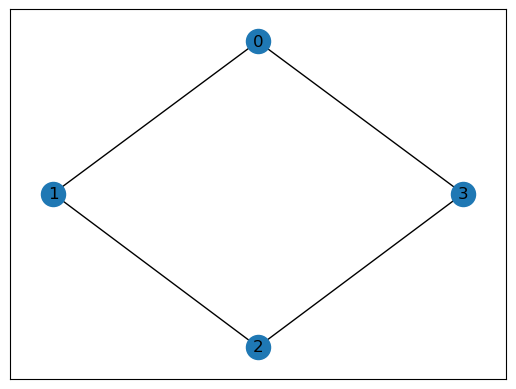

In [61]:
nx.draw_networkx(G_4)

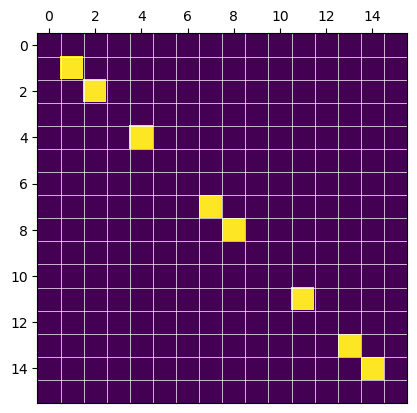

In [62]:
h_matrix = graph_to_h(G_4)
plt.imshow(h_matrix.real)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
line_data = np.arange(17)-0.5
for x in line_data:
    plt.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
# Add horizontal grid lines
for y in line_data:
    plt.axhline(y=y, color='white', linestyle='-', linewidth=0.5)

In [63]:
h_matrix.max()/3

(2.6666666666666665+0j)

In [64]:
np.diag(h_matrix)

array([0.+0.j, 8.+0.j, 8.+0.j, 0.+0.j, 8.+0.j, 0.+0.j, 0.+0.j, 8.+0.j,
       8.+0.j, 0.+0.j, 0.+0.j, 8.+0.j, 0.+0.j, 8.+0.j, 8.+0.j, 0.+0.j])

In [65]:
qiskit_h, pstrs = graph_to_qiskit(G_4)

4


In [66]:
pstrs

['ZIIZ', 'ZZII', 'IIZZ', 'IZZI']

In [67]:
num=6

In [68]:
[(4*"I", -num/2)]+[(p, 0.5) for p in pstrs]

[('IIII', -3.0), ('ZIIZ', 0.5), ('ZZII', 0.5), ('IIZZ', 0.5), ('IZZI', 0.5)]

In [69]:
ops = SparsePauliOp.from_list([(4*"I", -num/2)]+[(p, 0.5) for p in pstrs])

In [70]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

In [71]:
thetas = [Parameter(f"theta_{i}") for i in range(8)]
phis = [Parameter(f"phi_{i}") for i in range(12)]

In [72]:
qc = QuantumCircuit(4)

In [73]:
qc.rx(thetas[0],0)
qc.rx(thetas[1],1)
qc.rx(thetas[2],2)
qc.rx(thetas[3],3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(0, 2)
qc.rz(phis[0],1)
qc.rz(phis[1],2)
qc.rz(phis[2],3)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 1)

#-----------------
qc.cx(3, 0)
qc.cx(1, 2)
qc.cx(1, 3)
qc.rz(phis[3],0)
qc.rz(phis[4],2)
qc.rz(phis[5],3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.cx(3, 0)

#=====================
qc.rx(thetas[4],0)
qc.rx(thetas[5],1)
qc.rx(thetas[6],2)
qc.rx(thetas[7],3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(0, 2)
qc.rz(phis[6],1)
qc.rz(phis[7],2)
qc.rz(phis[8],3)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 1)

#-----------------
qc.cx(3, 0)
qc.cx(1, 2)
qc.cx(1, 3)
qc.rz(phis[9],0)
qc.rz(phis[10],2)
qc.rz(phis[11],3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.cx(3, 0)



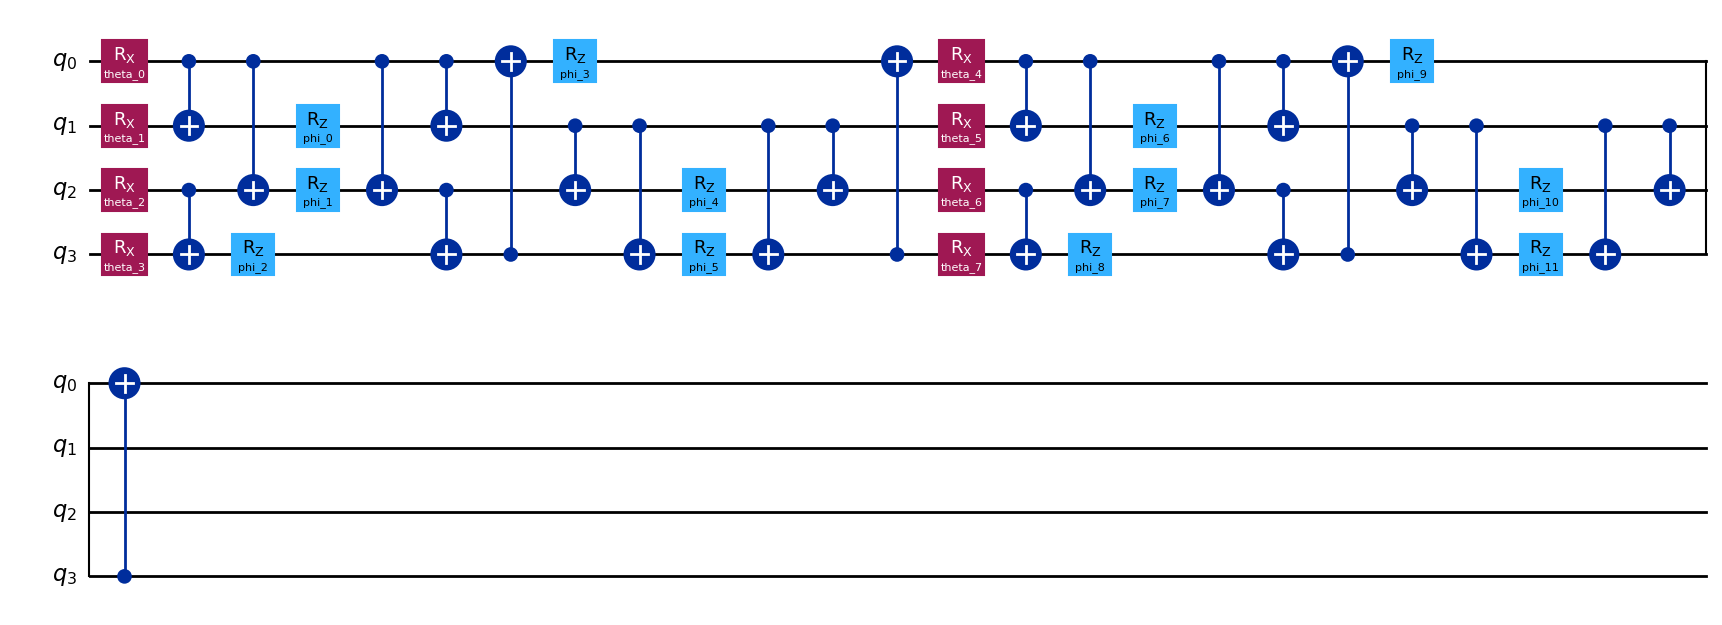

In [74]:
qc.draw("mpl")

In [75]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator


In [76]:
from qiskit.quantum_info import Operator

In [77]:
qiskit_hamiltonian = Operator(h_matrix)

In [78]:
qiskit_h

SparsePauliOp(['IIII', 'ZIIZ', 'ZZII', 'IIZZ', 'IZZI'],
              coeffs=[-2. +0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j])

In [79]:
estimator = Estimator()
x0 = np.pi/2 * np.random.random(8+12)
params = x0
pub = (qc.decompose(), [ops], [params])

In [80]:
result = estimator.run(pubs=[pub]).result()
energy = result[0].data.evs[0]
print(energy)

-2.1249254054365605


In [81]:
cost_history_dict = {
    "prev_vector": 0 * np.random.random(8+12),
    "iters": 0,
    "cost_history": [],
}

In [82]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """

    pub = (ansatz, [hamiltonian], [params])
    print(estimator)
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [83]:
estimator = Estimator()
res = minimize(
    cost_func,
    cost_history_dict["prev_vector"],
    args = (qc.decompose(), qiskit_h, estimator),
    method="cobyla",
    options={"maxiter":4000}
)

Iters. done: 1 [Current cost: 0.0]
Iters. done: 2 [Current cost: 0.0]
Iters. done: 3 [Current cost: 0.0]
Iters. done: 4 [Current cost: 0.0]
Iters. done: 5 [Current cost: 0.0]
Iters. done: 6 [Current cost: 0.0]
Iters. done: 7 [Current cost: 0.0]
Iters. done: 8 [Current cost: 0.0]
Iters. done: 9 [Current cost: 0.0]
Iters. done: 10 [Current cost: 0.0]
Iters. done: 11 [Current cost: 0.0]
Iters. done: 12 [Current cost: 0.0]
Iters. done: 13 [Current cost: 0.0]
Iters. done: 14 [Current cost: -0.45969769413186023]
Iters. done: 15 [Current cost: -0.8137344032686458]
Iters. done: 16 [Current cost: -1.1677711124054313]
Iters. done: 17 [Current cost: -1.4161468365471435]
Iters. done: 18 [Current cost: -1.9329185136397236]
Iters. done: 19 [Current cost: -1.992292709718842]
Iters. done: 20 [Current cost: -2.0516669057979606]
Iters. done: 21 [Current cost: -1.6536436208636127]
Iters. done: 22 [Current cost: -1.9213142506046523]
Iters. done: 23 [Current cost: -2.0209816226653]
Iters. done: 24 [Current

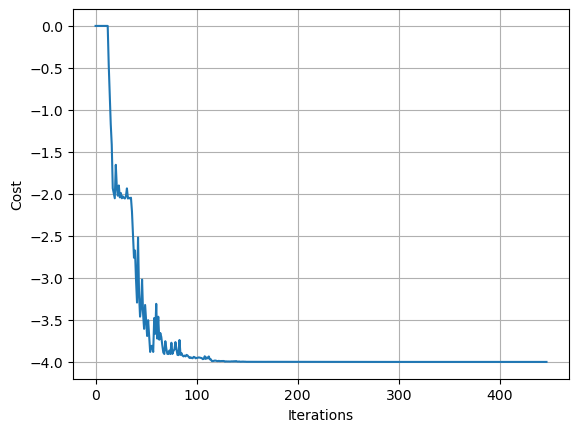

In [84]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.grid()
plt.draw()

In [85]:
pre_params = cost_history_dict["prev_vector"]

In [86]:
list(qc.parameters)

[Parameter(phi_0),
 Parameter(phi_1),
 Parameter(phi_10),
 Parameter(phi_11),
 Parameter(phi_2),
 Parameter(phi_3),
 Parameter(phi_4),
 Parameter(phi_5),
 Parameter(phi_6),
 Parameter(phi_7),
 Parameter(phi_8),
 Parameter(phi_9),
 Parameter(theta_0),
 Parameter(theta_1),
 Parameter(theta_2),
 Parameter(theta_3),
 Parameter(theta_4),
 Parameter(theta_5),
 Parameter(theta_6),
 Parameter(theta_7)]

In [87]:
pre_params

array([-1.67307239e-01, -3.33428004e-02,  2.18498235e-01,  2.51731093e-01,
        3.35632675e-02,  1.44456205e+00, -3.67496562e-04,  1.67135487e-01,
       -1.01941772e+00,  7.75141236e-02, -4.83568020e-02,  2.57903928e-02,
       -6.59031770e-06, -5.88062273e-01,  2.05953968e+00, -8.70256826e-06,
        3.14160004e+00,  5.88048981e-01,  1.08202314e+00, -4.72361364e-06])

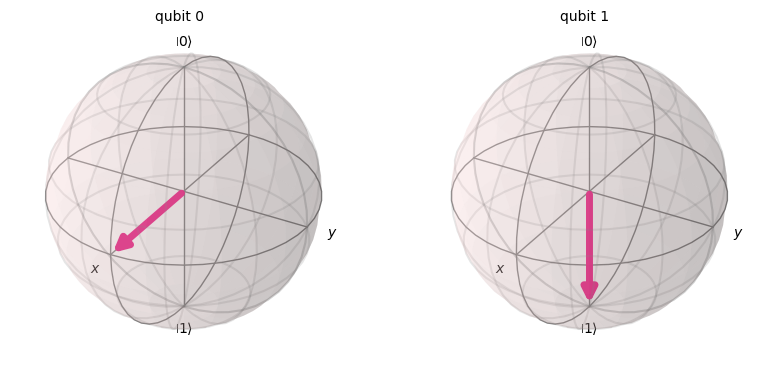

In [88]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
qc_ = QuantumCircuit(2)
qc_.h(0)
qc_.x(1)
 
state = Statevector(qc_)
plot_bloch_multivector(state)

In [89]:
optim_gate = qc.to_gate()

In [90]:
qc2 = QuantumCircuit(4)

In [91]:
p0 = list(qc.parameters)[0]

In [92]:
qc2.append(
    qc.assign_parameters({angle: value  for angle, value in zip(list(qc.parameters), cost_history_dict["prev_vector"])}),
    [0,1,2,3]
)

In [93]:
qc2.draw()

┌──────────────┐
q_0: ┤0             ├
     │              │
q_1: ┤1             ├
     │  circuit-278 │
q_2: ┤2             ├
     │              │
q_3: ┤3             ├
     └──────────────┘

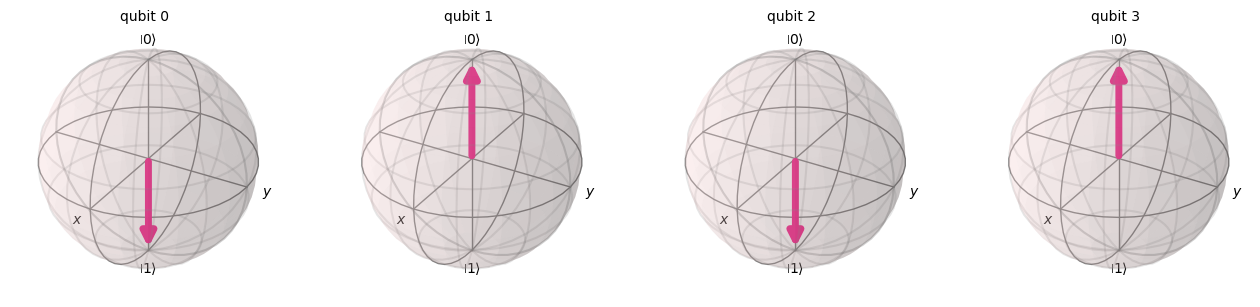

In [94]:
state = Statevector(qc2)
plot_bloch_multivector(state)

In [82]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile

In [83]:
st_backend = Aer.get_backend("statevector_simulator")

In [84]:
circ = transpile(qc2, st_backend)

In [85]:
result = st_backend.run(circ).result()

In [86]:
state_vector =  result.data()['statevector']

In [87]:
st_np = state_vector.data

In [88]:
st_np 

array([ 7.11010949e-08-6.51408093e-08j, -7.95090398e-06-3.97144073e-05j,
       -3.57478882e-09+8.60470354e-09j,  8.83479268e-06-8.95652876e-05j,
        3.74517345e-06+2.08943223e-06j, -2.68852216e-01+9.63181435e-01j,
       -7.42682814e-08+2.95098085e-07j, -1.40116569e-06-6.49172833e-06j,
        2.18044989e-13+6.61262372e-13j, -4.64067746e-08+1.19828552e-07j,
        2.29425745e-14+2.66489731e-15j, -1.07873624e-08+4.42887993e-09j,
        8.29307642e-12-7.71091564e-12j,  2.23504862e-07-4.93315601e-06j,
       -2.19805571e-12-1.03985340e-13j,  3.27391776e-07-2.32248592e-07j])

In [89]:
E = st_np.conj().T@h_matrix@st_np
E

matrix([[1.38186806e-08-5.98381072e-26j]])

In [90]:
np.abs(st_np)

array([9.64297191e-08, 4.05024816e-05, 9.31772709e-09, 8.99999684e-05,
       4.28859548e-06, 9.99999995e-01, 3.04300275e-07, 6.64121992e-06,
       6.96284096e-13, 1.28500859e-07, 2.30968266e-14, 1.16611391e-08,
       1.13240159e-11, 4.93821655e-06, 2.20051399e-12, 4.01403517e-07])

In [91]:
xdata = [format(i, "04b") for i in np.arange(16)]

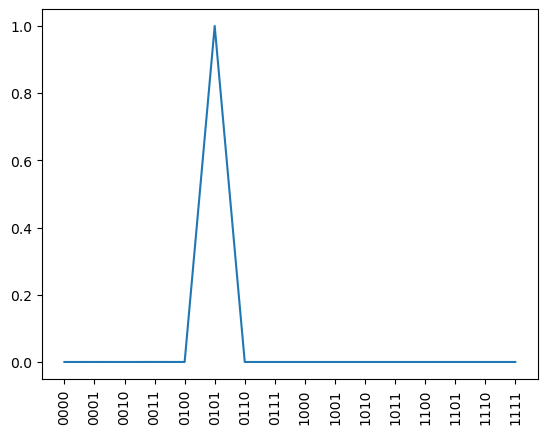

In [92]:
plt.plot(xdata, np.abs(st_np))
_ = plt.xticks(rotation=90)